In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(labels='Id', axis=1, inplace=True)  # Drop Id 

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Label Encode 'Species'

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [9]:
# Independent and Dependent variables

X = df.iloc[:, :-1]
Y = df['Species']

In [10]:
# Standard Scale Independent features

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

Text(0.5, 1.0, 'Elbow plot')

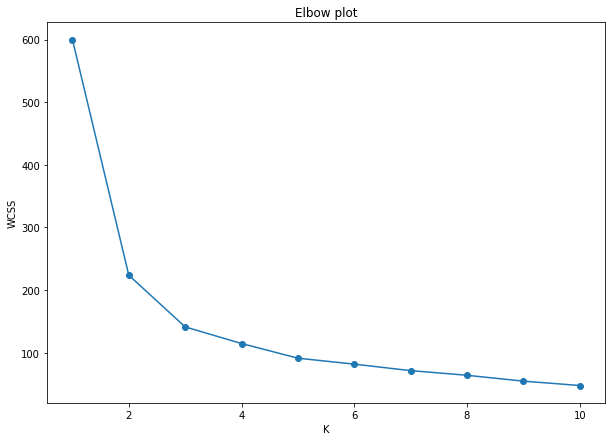

In [11]:
# Make elbow graph to find optimal k values or to find optimal numbers clusters

wcss = []  # list of wcss of kmeans model from k 1 to 10
K = []  # list of k (number of clusters) of kmeans model from k 1 to 10

for k in range(0, 11):  # here we will make 10 clusters from 1 to 10
    try:
        kmeans = KMeans(n_clusters=k, init='k-means++')  
        kmeans.fit(X) 

        K.append(k)
        wcss.append(kmeans.inertia_) 

    except OverflowError:  
        continue

plt.figure(figsize=(10, 7))  
        
plt.plot(K, wcss, marker='o')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow plot')

### Elbow plot shows that optimal number of clusters are 3.

In [12]:
final_kmeans = KMeans(n_clusters=3, init='k-means++')
final_kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
# Clusters

predicted_clusters = final_kmeans.predict(X)
print('Clusters: ', predicted_clusters)

Clusters:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [14]:
# Centroids

centroids = final_kmeans.cluster_centers_  
print('Centroids: ', centroids)

Centroids:  [[-0.01139555 -0.87288504  0.37688422  0.31165355]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.16743407  0.15377779  1.00314548  1.02963256]]


## Use PCA to view Clusters in 2D plot

In [15]:
pca = PCA()  
pca.fit(X)
temp_X = pca.transform(X)

In [16]:
# percentage of variance done by each PCA

pca_percentage = pca.explained_variance_ratio_ * 100
pca_percentage

array([72.77045209, 23.03052327,  3.68383196,  0.51519268])

[Text(0, 0.5, 'Percentage(%)'),
 Text(0.5, 0, 'PCA'),
 Text(0.5, 1.0, 'PCA plot')]

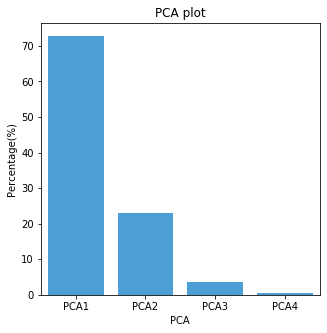

In [17]:
# PLot PCA

plt.rcParams["figure.figsize"] = (5, 5)

ax = sns.barplot(x=['PCA1', 'PCA2', 'PCA3', 'PCA4'], y= pca_percentage, color='#34a4eb')

ax.set(xlabel='PCA', ylabel='Percentage(%)', title='PCA plot')

### We can Clearly see first 2 Pca's are explanings total 72+23 = 95% of data.

In [18]:
# Select only first 2 PCA's

pca = PCA(n_components=2)    
pca.fit(X)
temp_X = pca.transform(X)

In [19]:
pca_1 = temp_X[:, 0]
pca_2 = temp_X[:, 1]
Species = Y

In [20]:
final_df = pd.DataFrame(data=zip(pca_1, pca_2, Species), index=range(0, len(Species)), 
                        columns=['PCA 1', 'PCA 2', 'Species'])

final_df.head()

,PCA 1,PCA 2,Species
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


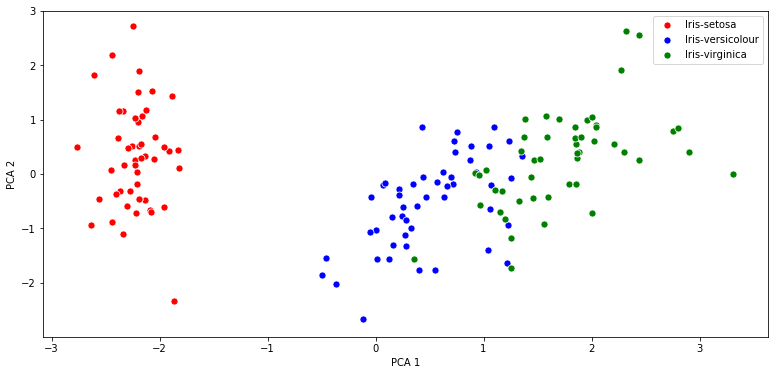

In [21]:
# Visualize Clusters

plt.rcParams["figure.figsize"] = (13, 6)

sns.scatterplot(x=round(final_df[(final_df['Species'] == 0)]['PCA 1'], 2), y=round(final_df[(final_df['Species'] == 0)]['PCA 2'], 2), color='r', s=50)
sns.scatterplot(x=round(final_df[(final_df['Species'] == 1)]['PCA 1'], 2), y=round(final_df[(final_df['Species'] == 1)]['PCA 2'], 2), color='b', s=50)
sns.scatterplot(x=round(final_df[(final_df['Species'] == 2)]['PCA 1'], 2), y=round(final_df[(final_df['Species'] == 2)]['PCA 2'], 2), color='g', s=50)

plt.legend(labels=['Iris-setosa', 'Iris-versicolour', 'Iris-virginica'])

plt.savefig('Species_Cluster.png') # Save Figure